# in class exercises for 10.17.2018 (FFT + practice plotting + boolean indexing)

[npy file format](https://www.numpy.org/devdocs/reference/generated/numpy.lib.format.html)

[npz file format (save several arrays)](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.savez.html)

[article about advantages of npy/npz format compared to csv and other common formats](https://towardsdatascience.com/why-you-should-start-using-npy-file-more-often-df2a13cc0161)



## First import data from eeg_data00.npz

In [1]:
# start by importing the modules that you'll need. 
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

# also define the default font we'll use for figures. 
fig_font = {'fontname':'Arial', 'size':'20'}

## load eeg_data00.npz...
* you should find that it has three arrays: data, tx, and sr (with 'data' a #trials x # timepoints array containing the EEG data, the time of each data acquisition in tx, and the sample rate stored as sr).  

In [2]:
# load the data...
eeg = np.load('eeg_data00.npz')

# get the different arrays like this...kind of like a structure in matlab. 
eeg['data']
eeg['sr']
eeg['tx']

# and can query the attributes of the data like this...which will tell us that there 960 trials and 876 timepoints per trial sampled
# at 250Hz
print('Shape of the big eeg data set: ', eeg['data'].shape)
print('Sample rate: ', eeg['sr'])

# and if you want to save some typing, especially because we only have a few variables, you reassign the different arrays like this
data = eeg['data']
sr = eeg['sr']
tx = eeg['tx']
# now you can just write data instead of eeg['data'] (and can for tx and sr as well...)

Shape of the big eeg data set:  (960, 876)
Sample rate:  250


## First - plot the data! (always do this first). 
* Compute the mean across all trials and then plot with tx on the xaxis. 
* Remember - good form is to specify the axis that you want to average over when using np.mean!

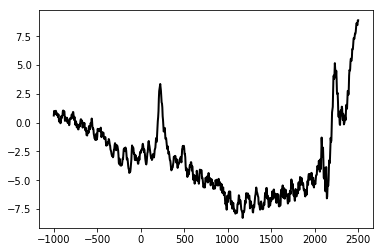

In [23]:
# Y axis = the data averaged across trials
# X axis = time of each data acquisition

mean_data = np.mean(data, axis=0)
plt.plot(tx, mean_data, "k-", linewidth = 2)
plt.show()

## Now grab the data from time 0 until time 2000 and FFT it! 
* hint: you can use boolean indexing by selecting the columns from the 'data' matrix that meet: (tx>=0)  & (tx<2000)
* while you're at it, go ahead and grab the timepoints corresponding to that interval as well so that you have an array for the x-axis of any plots

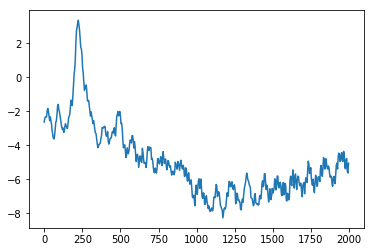

In [31]:
dataSubset = data[:, (tx >= 0) & (tx < 2000)]
txSubset = tx[(tx >= 0) & (tx < 2000)] 
plt.plot(txSubset, np.mean(dataSubset, axis = 0))
plt.show()

## Do the FFT on the data averaged across trials (so first avg, then FFT)

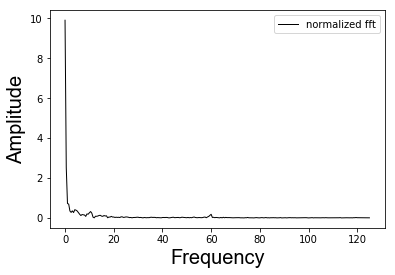

In [52]:
# Get the mean across rows for this subset of data (axis = 0)
dataSubsetMean = np.mean(dataSubset, axis = 0)

# Get the FFT on those means
dataSubsetFFT = np.fft.rfft(dataSubsetMean)

# Get the amplitude by using absolute value
amp = np.abs(dataSubsetFFT)
# Now normalize by number of data points (len(dataSubsetMean)) and divide
# by 2 to ditch negative frequencies
amp = (amp / len(dataSubsetMean)) * 2 

# Get frequency with built in function
# Feed in number of data points and sample spacing 
# (which is the inverse of sampling rate, i.e. 1 / sampling rate)
freq = np.fft.rfftfreq(len(dataSubsetMean), 1/sr)

# Plotting the FFT will have Frequency on X axis and Amplitude on Y axis
plt.plot(freq, amp, "k-", linewidth = 1)
plt.legend(["normalized fft"], loc = "best", fancybox = 1)
plt.xlabel("Frequency", **fig_font)
plt.ylabel("Amplitude", **fig_font)
plt.show()

## Now lets look at a few frequency segments to see what is going on
* First plot just the frequencies in between 55 and 65Hz (use boolean indexing)
* Then look at the frequencies in between 5 and 20Hz

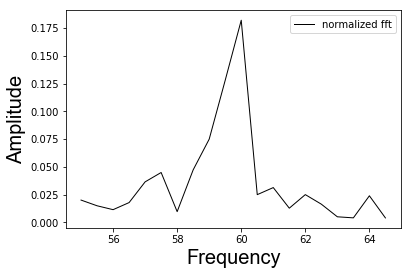

In [65]:
# "Look at frequency segment" means to make slice of data from freq

# x = (freq >= 55) & (freq < 65) returns TRUE and FALSE values
# x = [(freq >= 55) & (freq < 65)] also returns TRUE and FALSE
# x = freq[(freq >= 55) & (freq < 65)] returns the actual values

# Make only the items indexed from 55 to 65 TRUE 
# Getting list of TRUE & FALSE so that we can apply to other arrays
# Wouldn't work if we took actual values
freqSubset55to65 = (freq >= 55) & (freq < 65)

# Plot with Frequency on X axis and Amplitude on Y axis
plt.plot(freq[freqSubset55to65], amp[freqSubset55to65], "k", linewidth = 1)

# Make plot more informative
plt.legend(["normalized fft"], loc = "best", fancybox = 1)
plt.xlabel("Frequency", **fig_font)
plt.ylabel("Amplitude", **fig_font)
plt.show()

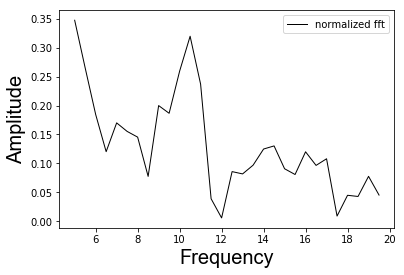

In [67]:
freqSubset5to20 = (freq >= 5) & (freq < 20)

# Plot with Frequency on X axis and Amplitude on Y axis
plt.plot(freq[freqSubset5to20], amp[freqSubset5to20], "k", linewidth = 1)

# Make plot more informative
plt.legend(["normalized fft"], loc = "best", fancybox = 1)
plt.xlabel("Frequency", **fig_font)
plt.ylabel("Amplitude", **fig_font)
plt.show()

## Remember what the above plots look like, and then do something that *seems* just a little different
* FFT each trial 
* Then compute the amplitude on each trial
* Then compute the average amplitude across all trials
* Then plot like you did above - first over all frequs, then zoom in and plot the 55-65hz window and the 5-20Hz window 
* To make this work, note that np.fft.rfft can operate on the entire data matrix at once. You should ALWAYS specify the axis that you want the FFT to work over (in this case the time axis, or axis 1). np.fft.rfft will default to the LAST axis if you specify nothing, which in this case is ok but it would totally NOT be ok if your data were transposed
* hint: handy to store the shape of the data matrix before you do all this so that you can pass in the number of timepoints to the amplitude normalization function and the freq-axis function. e.g. r,c = data.shape

[np.fft.rfft documentation](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.fft.rfft.html)

(960, 500)


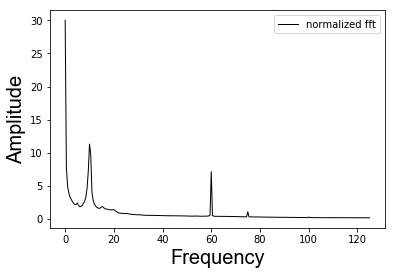

In [86]:
# Get the shape of the data -- here, (960, 500) = 960 rows x 500 columns
# Then assign to r,c -- r = rows; c = columns
r,c = dataSubset.shape
print(dataSubset.shape)

# FFT each trial using (axis = 1)
dataSubsetFFT2 = np.fft.rfft(dataSubset, axis = 1)

# Compute amplitude on each trial
amp2 = (np.abs(dataSubsetFFT2) / c) * 2 

# Compute the average amplitude across all trials
ampMeanAcrossTrials = np.mean(amp2, axis = 0)

# Get frequency with built in function
# Feed in number of data points (c, see above) and sample spacing 
# (which is the inverse of sampling rate, i.e. 1 / sampling rate)
freq2 = np.fft.rfftfreq(c, 1/sr)

# Plot over all frequencies
plt.plot(freq2, ampMeanAcrossTrials, "k-", linewidth = 1)

# Plot design
plt.legend(["normalized fft"], loc = "best", fancybox = 1)
plt.xlabel("Frequency", **fig_font)
plt.ylabel("Amplitude", **fig_font)
plt.show()

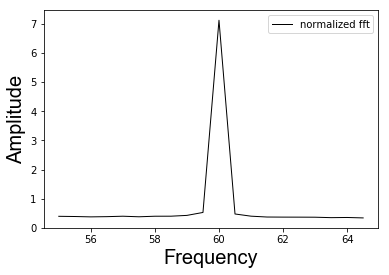

In [94]:
# Use boolean indexing to pull out frequencies from 55hz to 65hz
freqSubset55to65_2 = (freq2 >= 55) & (freq2 < 65)

# Plot with Frequency on X axis and Amplitude on Y axis
plt.plot(freq2[freqSubset55to65_2], ampMeanAcrossTrials[freqSubset55to65_2], "k", linewidth = 1)

# Plot design
plt.legend(["normalized fft"], loc = "best", fancybox = 1)
plt.xlabel("Frequency", **fig_font)
plt.ylabel("Amplitude", **fig_font)
plt.show()

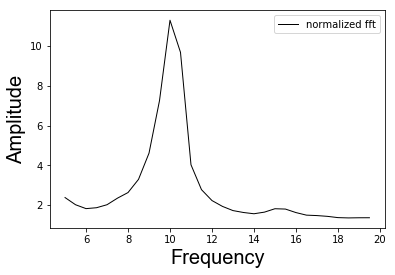

In [96]:
# Use boolean indexing to pull out frequencies from 5hz to 20hz
freqSubset5to20_2 = (freq2 >= 5) & (freq2 < 20)

# Plot with Frequency on X axis and Amplitude on Y axis
plt.plot(freq2[freqSubset5to20_2], ampMeanAcrossTrials[freqSubset5to20_2], "k", linewidth = 1)

# Plot design
plt.legend(["normalized fft"], loc = "best", fancybox = 1)
plt.xlabel("Frequency", **fig_font)
plt.ylabel("Amplitude", **fig_font)
plt.show()

## Now compare the plots you got just now (FFT each trial, then compute amp, then average) with the plots you got when you averaged in time domain first and THEN did the FFT. Why are they different?
* hint: think about phase...

## Switch to a new data set...load eeg_data01.npz. To make it easy I renamed all the variables in this data set to match the var names in the last data set (data, sr, tx)

In [137]:
# load the data...
eeg = np.load('eeg_data01.npz')

# get the different arrays like this...kind of like a structure in matlab. 
eeg['data']
eeg['sr']
eeg['tx']

# and can query the attributes of the data like this...which will tell us that there 1600 trials and 4102 timepoints per trial sampled
# at 1024Hz
print('Shape of the big eeg data set: ', eeg['data'].shape)
print('Sample rate: ', eeg['sr'])

# and if you want to save some typing, especially because we only have a few variables, you reassign the different arrays like this
data = eeg['data']
sr = eeg['sr']
tx = eeg['tx']

print(data.size)

Shape of the big eeg data set:  (1600, 4102)
Sample rate:  1024
6563200


## Plot the data, just like we did above

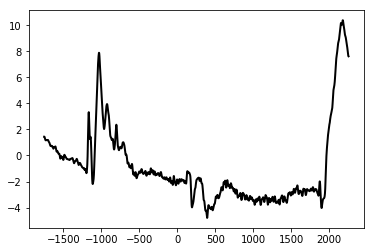

In [105]:
# Y axis = the data averaged across trials
# X axis = time of each data acquisition

mean_data = np.mean(data, axis=0)
plt.plot(tx, mean_data, "k-", linewidth = 2)
plt.show()

## Now segment the data from time 0 to time 1753 and plot to make sure it looks right

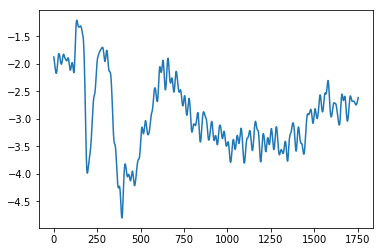

In [106]:
dataSubset = data[:, (tx >= 0) & (tx < 1753)]
txSubset = tx[(tx >= 0) & (tx < 1753)]
plt.plot(txSubset, np.mean(dataSubset, axis = 0))
plt.show()

## Next:
* compute the FFT of the data on each trial
* then compute the amp on each trial
* then plot the average amplitude over a window from 12Hz to 35Hz

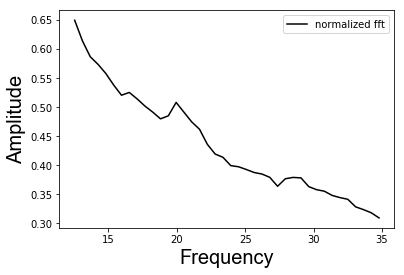

In [125]:
# USING METHOD 1:
    # FFT all trials
    # Compute amplitude
    # Then average across trials

# Get the shape of the data
r,c = dataSubset.shape

# FFT each trial
dataSubsetFFT = np.fft.rfft(dataSubset, axis= 1)

# Compute amplitude on each trial
amp = (np.abs(dataSubsetFFT) / c) * 2

# Compute average amplitude across trials
ampAcrossTrials = np.mean(amp, axis = 0)

# Get frequency with built-in function
freq = np.fft.rfftfreq(c, 1/sr)

# Pull out frequencies from 12hz to 35hz
freq12to35 = (freq >= 12) & (freq < 35)

# Plot with Freq on X axis and Amp on Y axis
plt.plot(freq[freq12to35], ampAcrossTrials[freq12to35], "k")

# Plot design
plt.legend(["normalized fft"], loc = "best", fancybox = 1)
plt.xlabel("Frequency", **fig_font)
plt.ylabel("Amplitude", **fig_font)
plt.show()

## Not much going on...so now 
* average the data in the time domain (i.e. avg across all trials)
* then FFT, compute amp, then plot over the same window

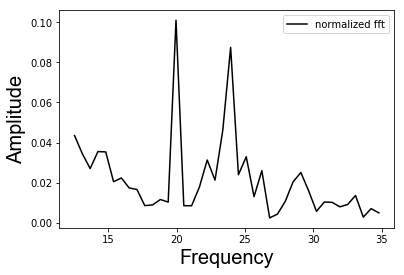

In [148]:
# USING METHOD 2:
    # Average across trials
    # Then FFT
    # Then compute amplitude
    
# Get the mean across trials
dataSubsetMean = np.mean(dataSubset, axis = 0)

# Get the FFT on those trials
dataSubsetMeanFFT = np.fft.rfft(dataSubsetMean)

# Compute amplitude
amp = (np.abs(dataSubsetMeanFFT) / len(dataSubsetMean)) * 2

# Get frequency with built-in function
freq = np.fft.rfftfreq(len(dataSubsetMean), 1/sr)

# Pull out frequencies from 12hz to 35hz
freq12to35 = (freq >= 12) & (freq < 35)

# Plot amplitude by frequency
plt.plot(freq[freq12to35], amp[freq12to35], "k")

# Plot design
plt.legend(["normalized fft"], loc = "best", fancybox = 1)
plt.xlabel("Frequency", **fig_font)
plt.ylabel("Amplitude", **fig_font)
plt.show()

## now what do you see? 
* what can infer about the experiment based on the difference in the amplitude spectrum from the two different methods (FFT all trials, then convert to amp, then average versus Average in time domain, then FFT and then compute amp)